In [1061]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\renat\OneDrive\Área de Trabalho\projeto 2 cdados\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [1062]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019['Ano'] = 2019
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,300.0,2019
1,9E,MSP,CVG,0.0,596.0,2019
2,9E,DTW,CVG,0.0,229.0,2019
3,9E,TLH,ATL,0.0,223.0,2019
4,9E,ATL,FSM,0.0,579.0,2019


In [1063]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020['Ano'] = 2020
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,174.0,2020
1,EV,TUL,ORD,0.0,585.0,2020
2,EV,EWR,TYS,0.0,631.0,2020
3,EV,BTR,IAH,0.0,253.0,2020
4,EV,RIC,IAH,0.0,1157.0,2020


In [1064]:
General_base  = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

General_base ['OP_CARRIER'] = General_base ['OP_CARRIER'].astype('category')
General_base ['ORIGIN'] = General_base ['ORIGIN'].astype('category')
General_base ['DEST'] = General_base ['DEST'].astype('category')
General_base ['CANCELLED'] = General_base ['CANCELLED'].astype('category')



In [1065]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [1066]:
General_base ['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [1067]:
Dados_gerais_00 = General_base 
Dados_gerais = Dados_gerais_00.sample(frac = 0.0001)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)


In [1068]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
614595,Endeavor,CLE,DTW,0.0,95.0,2019
975266,Midwest Airlines,SDF,CLT,0.0,335.0,2019
309118,Delta Air Lines,BIL,MSP,0.0,748.0,2020
730222,Midwest Airlines,LGA,IND,0.0,660.0,2019
641719,American Airlines Cargo,DFW,SLC,0.0,989.0,2019
...,...,...,...,...,...,...
408571,SkyWest Airlines,PSP,SFO,0.0,421.0,2020
1067122,Delta Air Lines,RDU,ATL,0.0,356.0,2019
930036,Alaska Airlines,SJC,OGG,0.0,2355.0,2019
24016,Southwest Airlines,BWI,JAX,0.0,663.0,2020


In [1069]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]
#Voo_cancelados = Treinamento.loc[Cancelados,:]
#print(len(Voo_cancelados))
print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
1
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
118


In [1070]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,118.0,889.788,628.518,95.0,415.0,717.0,1093.75,2701.0
1.0,1.0,2354.000,NaN,2354.0,2354.0,2354.0,2354.00,2354.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,1.0,2354.0,NaN,2354.0,2354.0,2354.0,2354.0,2354.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,118.0,889.788,628.518,95.0,415.0,717.0,1093.75,2701.0


ZeroDivisionError: float division by zero

CANCELLED,0.0,1.0
OP_CARRIER,,
Atlatic Southeast Airlines,75.0,25.0
Midwest Airlines,90.0,10.0
Southwest Airlines,96.4,3.6
All,97.5,2.5
Mesa Airlines,100.0,0.0
United Airlines Cargo,100.0,0.0
SkyWest Airlines,100.0,0.0
Comair Delta Connection,100.0,0.0
Spirit Airlines,100.0,0.0


None


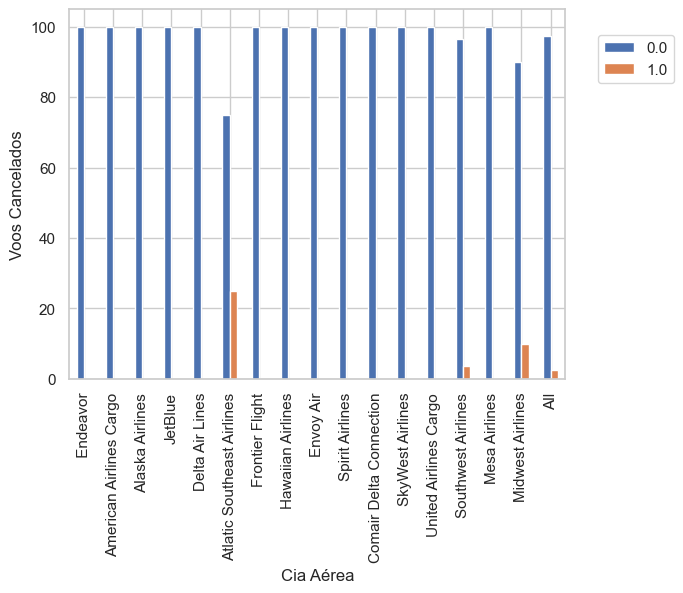

CANCELLED,0.0,1.0
DEST,,
LEX,0.0,100.0
BUR,50.0,50.0
IAH,66.7,33.3
All,97.5,2.5
SJU,100.0,0.0
LIH,100.0,0.0
MAF,100.0,0.0
MCI,100.0,0.0
TRI,100.0,0.0


None


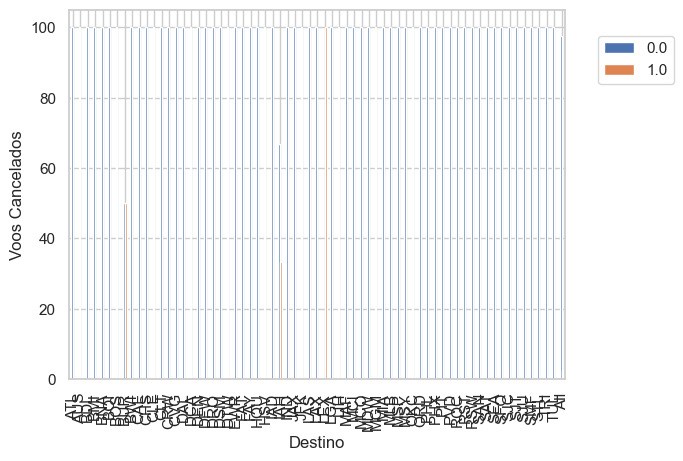

CANCELLED,0.0,1.0
ORIGIN,,
OAK,50.0,50.0
MCI,66.7,33.3
ORD,87.5,12.5
All,97.5,2.5
LAS,100.0,0.0
LAX,100.0,0.0
LGA,100.0,0.0
LGB,100.0,0.0
LIT,100.0,0.0


None


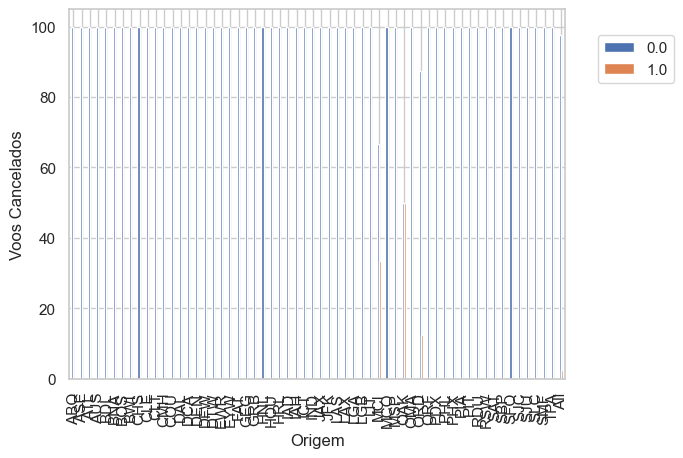

In [ ]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'],  normalize='index', margins=True).round(3)*100
cia_canc__ordenado = cia_canc.sort_values(0.0)
print(display(cia_canc__ordenado.head(15)))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc_ordenado.head(35)))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc_ordenado.head(35)))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



In [ ]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("p cia value is " + str(pcia))
if pcia <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independente da CIA aérea')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("p dest value is " + str(pdest))
if pdest <= alpha:
    print('Destino é Dependente')
else:
    print('Independente do DESTINO')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("p dest value is " + str(porg))
if porg <= alpha:
    print('Dependente da Origem')
else:
    print('Independente da Origem')

p cia value is 8.250841703415331e-49
Dependent (reject H0)
p dest value is 0.0
Destino é Dependente
p dest value is 0.0
Dependente da Origem


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [ ]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
65792,Southwest Airlines,MCO,BNA,0.0,616.0,2020
63559,Southwest Airlines,MCI,BNA,0.0,491.0,2020
145972,American Airlines Cargo,LAX,PHL,0.0,2402.0,2020
815842,Envoy Air,JAX,MIA,0.0,335.0,2019
173029,Midwest Airlines,DCA,LGA,0.0,214.0,2020


In [ ]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

array(['CANCELLED', 'DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor',
       'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines',
       'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines',
       'OP_CARRIER_Atlatic Southeast Airlines',
       'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air',
       'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air',
       'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection',
       'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines',
       'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI',
       'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT',
       'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ',
       'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO',
       'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART',
       'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY',
       'ORIGIN_AUS', 'ORIGIN_

In [ ]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
65792,0.0,616.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63559,0.0,491.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145972,0.0,2402.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815842,0.0,335.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173029,0.0,214.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94951,0.0,229.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593857,0.0,752.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6709,0.0,645.0,2020,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
335549,0.0,199.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827677,0.0,808.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
linhas = len(data_final)
col=len(data_final.columns)
b=0
while b < col:
    nome = data_final.columns[b]
    a = 0
    sum = 0
    while a<linhas:
        sum+=data_final.iloc[a,b]
        a+=1
    if sum == 0 and nome!= "CANCELLED":
        data_final = data_final.drop(nome, axis=1)
    b+=1
data_final

In [ ]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
65792,0.0,616.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63559,0.0,491.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145972,0.0,2402.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815842,0.0,335.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173029,0.0,214.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94951,0.0,229.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593857,0.0,752.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6709,0.0,645.0,2020,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
335549,0.0,199.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827677,0.0,808.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:,['CANCELLED']]
y.value_counts()

CANCELLED
0.0          12
1.0           0
dtype: int64

In [ ]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
65792,0.0,616.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63559,0.0,491.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145972,0.0,2402.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815842,0.0,335.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173029,0.0,214.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94951,0.0,229.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593857,0.0,752.0,2020,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6709,0.0,645.0,2020,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
335549,0.0,199.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827677,0.0,808.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:

data_final_vars=data_final.columns.values.tolist()
y=['CANCELLED']
X=[i for i in data_final_vars if i not in y]

import statsmodels.api as sm
logit_model=sm.Logit(y_test,X_test)
result=logit_model.fit()
print(result.summary2())

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
print(X)

['DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor', 'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines', 'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air', 'OP_CARRIER_Comair Delta Connection', 'OP_CARRIER_United Airlines Cargo', 'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines', 'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABI', 'ORIGIN_ABR', 'ORIGIN_ACT', 'ORIGIN_ACY', 'ORIGIN_ADQ', 'ORIGIN_AGS', 'ORIGIN_ALO', 'ORIGIN_ANC', 'ORIGIN_ART', 'ORIGIN_ATL', 'ORIGIN_ATY', 'ORIGIN_AVL', 'ORIGIN_AZA', 'ORIGIN_BDL', 'ORIGIN_BFF', 'ORIGIN_BFM', 'ORIGIN_BGR', 'ORIGIN_BIL', 'ORIGIN_BJI', 'ORIGIN_BLV', 'ORIGIN_BNA', 'ORIGIN_BOS', 'ORIGIN_BQK', 'ORIGIN_BRD', 'ORIGIN_BRW', 'ORIGIN_BTR', 'ORIGIN_BUF', 'ORIGIN_BWI', 'ORIGIN_CAE', 'ORIGIN_CDC', 'ORIGIN_CGI', 'ORIGIN_CHO', 'ORIGIN_CID', 'ORIGIN_CKB', 'ORIGIN_CLL', 'ORIGIN_CLT', 'ORIGIN_CMI', 'ORIGIN_CNY', 'ORIGIN_COS', 'ORIGIN_CPR', 'ORIGIN_CRW', 'ORIGIN_CVG', 'ORIGIN_CYS', 'ORIGIN_DAL'

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [ ]:
# código de validação de resultados 